In [1]:
from google.colab import files
uploaded = files.upload()

Saving Mall_Customers.csv to Mall_Customers.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df= pd.read_csv('Mall_Customers.csv')

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
df.shape

(200, 5)

In [7]:
for i in df.drop(columns=['CustomerID']).columns:
  print(df[i].unique())

['Male' 'Female']
[19 21 20 23 31 22 35 64 30 67 58 24 37 52 25 46 54 29 45 40 60 53 18 49
 42 36 65 48 50 27 33 59 47 51 69 70 63 43 68 32 26 57 38 55 34 66 39 44
 28 56 41]
[ 15  16  17  18  19  20  21  23  24  25  28  29  30  33  34  37  38  39
  40  42  43  44  46  47  48  49  50  54  57  58  59  60  61  62  63  64
  65  67  69  70  71  72  73  74  75  76  77  78  79  81  85  86  87  88
  93  97  98  99 101 103 113 120 126 137]
[39 81  6 77 40 76 94  3 72 14 99 15 13 79 35 66 29 98 73  5 82 32 61 31
 87  4 92 17 26 75 36 28 65 55 47 42 52 60 54 45 41 50 46 51 56 59 48 49
 53 44 57 58 43 91 95 11  9 34 71 88  7 10 93 12 97 74 22 90 20 16 89  1
 78 83 27 63 86 69 24 68 85 23  8 18]


### Data Preprocessing

In [8]:
gender_map={'Male':0,'Female':1}
df['Gender']=df['Gender'].map(gender_map)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,0,19,15,39
1,2,0,21,15,81
2,3,1,20,16,6
3,4,1,23,16,77
4,5,1,31,17,40


In [9]:
df.describe()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,0.560000,38.850000,60.560000,50.200000
std,57.879185,0.497633,13.969007,26.264721,25.823522
min,1.000000,0.000000,18.000000,15.000000,1.000000
25%,50.750000,0.000000,28.750000,41.500000,34.750000
50%,100.500000,1.000000,36.000000,61.500000,50.000000
75%,150.250000,1.000000,49.000000,78.000000,73.000000
max,200.000000,1.000000,70.000000,137.000000,99.000000


### Clustering

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

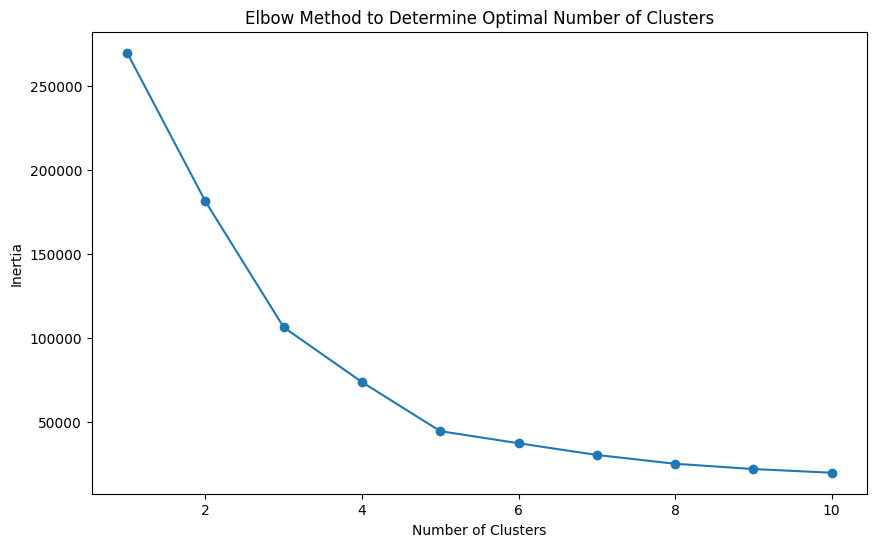

In [11]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method to Determine Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


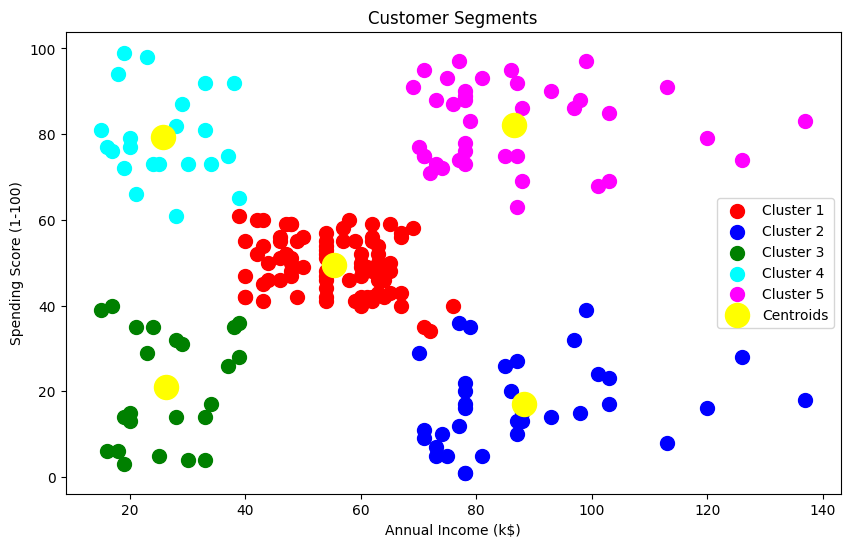

In [16]:
kmeans = KMeans(n_clusters=5, random_state=42)
cluster_labels = kmeans.fit_predict(X)
plt.figure(figsize=(10, 6))
plt.scatter(X['Annual Income (k$)'][cluster_labels == 0], X['Spending Score (1-100)'][cluster_labels == 0], s=100, c='red', label='Cluster 1')
plt.scatter(X['Annual Income (k$)'][cluster_labels == 1], X['Spending Score (1-100)'][cluster_labels == 1], s=100, c='blue', label='Cluster 2')
plt.scatter(X['Annual Income (k$)'][cluster_labels == 2], X['Spending Score (1-100)'][cluster_labels == 2], s=100, c='green', label='Cluster 3')
plt.scatter(X['Annual Income (k$)'][cluster_labels == 3], X['Spending Score (1-100)'][cluster_labels == 3], s=100, c='cyan', label='Cluster 4')
plt.scatter(X['Annual Income (k$)'][cluster_labels == 4], X['Spending Score (1-100)'][cluster_labels == 4], s=100, c='magenta', label='Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')
plt.title('Customer Segments')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

- Cluster 1 (Red): Moderate Income, Moderate Spending Score
- Cluster 2 (Blue): Moderate to High Income, Low Spending Score
- Cluster 3 (Green): Low Income, Low Spending Score
- Cluster 4 (Cyan): Low Income, High Spending Score
- Cluster 5 (Magenta): High Income, High Spending Score

Based on the above market basket analysis it is observed that the mall should target individuals in Cluster 4, and Cluster 5 aggressively, and can also look into targeting those in Cluster 1 as these are the clusters with the higher spending scores, i.e., individuals in these clusters are more likely to spend at the mall.

In order to increase spending scores of Cluster 2, and Cluster 3 loyalty programs, or special offers can be created to attract customers.

For Cluster 1 customized promotions should be conducted to increase their spending score.

### Data Visualizations for the Clusters

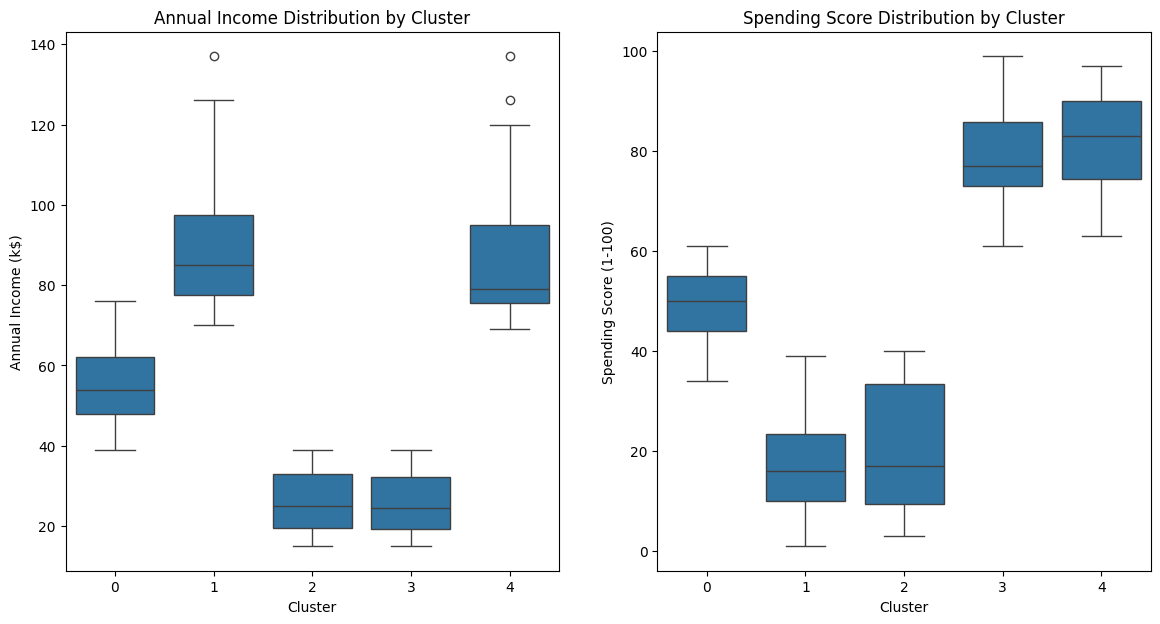

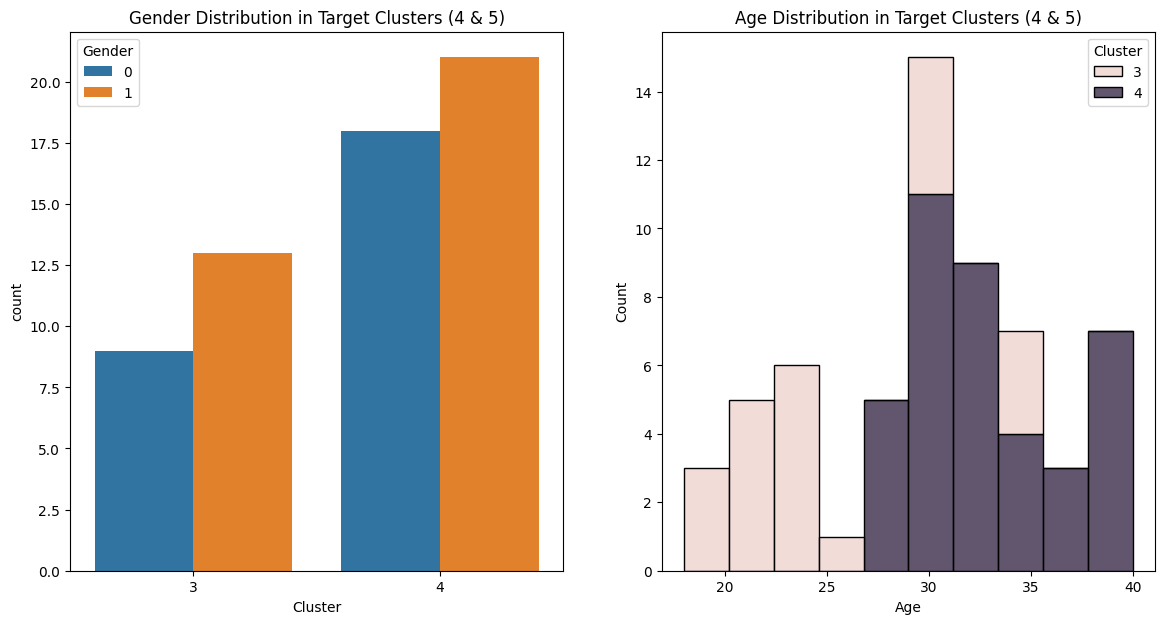

In [19]:
df['Cluster'] = cluster_labels

plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
sns.boxplot(x='Cluster', y='Annual Income (k$)', data=df)
plt.title('Annual Income Distribution by Cluster')

plt.subplot(1, 2, 2)
sns.boxplot(x='Cluster', y='Spending Score (1-100)', data=df)
plt.title('Spending Score Distribution by Cluster')
plt.show()

plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
sns.countplot(x='Cluster', hue='Gender', data=df[df['Cluster'].isin([3, 4])])
plt.title('Gender Distribution in Target Clusters (4 & 5)')

plt.subplot(1, 2, 2)
sns.histplot(data=df[df['Cluster'].isin([3, 4])], x='Age', hue='Cluster', multiple='stack', bins=10)
plt.title('Age Distribution in Target Clusters (4 & 5)')
plt.show()